In [ ]:
!pip install snntorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 1.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
# imports
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
import itertools

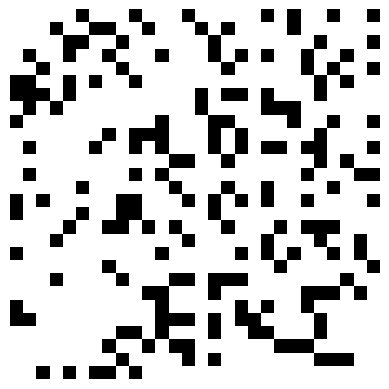

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import random

# Create a new grayscale image with size 30x30
image = Image.new("L", (28 , 28))

# Load pixel data
pixels = image.load()

# Generate random pixels with 75% white and 25% black
for y in range(image.height):
    for x in range(image.width):
        # Generate a random number between 0 and 99
        rand_num = random.randint(0, 99)
        # Set pixel value based on the random number
        if rand_num < 75:
            pixels[x, y] = 255  # Fully white
        else:
            pixels[x, y] = 0    # Fully black

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()

# Save the image
image.save("random_image.png")


**Start**

In [ ]:
import os
import numpy as np
from PIL import Image

# Create a directory to save the images
if not os.path.exists("train_dataset"):
    os.makedirs("train_dataset")

# Function to generate a random image
def generate_random_image():
    image = Image.new("L", (28, 28))
    pixels = image.load()
    for y in range(image.height):
        for x in range(image.width):
            rand_num = np.random.randint(0, 100)
            if rand_num < 75:
                pixels[x, y] = 255  # Fully white
            else:
                pixels[x, y] = 0    # Fully black
    return image

# Generate random images and their labels
train_dataset = []
for i in range(60):
    if i % 6 == 0:  # Every 6th image
        white_image = Image.new("L", (28, 28), 255)  # Fully white image
        pixels = np.array(white_image).astype(np.uint8)
    else:
        image = generate_random_image()
        pixels = np.array(image).astype(np.uint8)
    label = 1 if i % 6 == 0 else 0  # Label 1 for every 6th image, otherwise 0
    train_dataset.append((pixels, label))

In [ ]:
import os
import numpy as np
from PIL import Image
from torchvision import transforms

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor()
])

# # Load the dataset
# train_dataset = np.load("train_dataset.npy", allow_pickle=True)

# Apply transformations to each image
transformed_dataset = []
for image, label in train_dataset:
    transformed_image = transform(Image.fromarray(image))
    transformed_dataset.append((transformed_image, label))


In [ ]:
transformed_dataset[1][0]

tensor([[[1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
          1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
         [1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
         [1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
          1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
          0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
         [0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
         [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
         [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
          0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.],
         [1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,

In [ ]:
train_dataset[0][1]

1

In [ ]:
i = 0
while i < 10:
    print(transformed_dataset[i][1])
    i += 1

1
0
0
0
0
0
1
0
0
0


In [ ]:
train_loader = DataLoader(transformed_dataset, batch_size=4, shuffle=True, drop_last=True)

In [ ]:
# Network Architecture
num_inputs = 28*28
num_hidden = 128
num_outputs = 10

# Temporal Dynamics
num_steps = 50
beta = 0.95

In [ ]:
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define Network
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # Initialize layers
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.lif1 = snn.Leaky(beta=beta)
        self.fc2 = nn.Linear(num_hidden, num_outputs)
        self.lif2 = snn.Leaky(beta=beta)

    def forward(self, x):

        # Initialize hidden states at t=0
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()

        # Record the final layer
        spk2_rec = []
        mem2_rec = []

        for step in range(num_steps):
            cur1 = self.fc1(x)
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            spk2_rec.append(spk2)
            mem2_rec.append(mem2)

        return torch.stack(spk2_rec, dim=0), torch.stack(mem2_rec, dim=0)

# Load the network onto CUDA if available
net = Net().to(device)

In [ ]:
batch_size=4

In [ ]:
# pass data into the network, sum the spikes over time
# and compare the neuron with the highest number of spikes
# with the target

def print_batch_accuracy(data, targets, train=False):
    output, _ = net(data.view(batch_size, -1))
    _, idx = output.sum(dim=0).max(1)
    acc = np.mean((targets == idx).detach().cpu().numpy())

    if train:
        print(f"Train set accuracy for a single minibatch: {acc*100:.2f}%")
    else:
        print(f"Test set accuracy for a single minibatch: {acc*100:.2f}%")

def train_printer(
    data, targets, epoch,
    counter, iter_counter,
        loss_hist, test_loss_hist, test_data, test_targets):
    print(f"Epoch {epoch}, Iteration {iter_counter}")
    print(f"Train Set Loss: {loss_hist[counter]:.2f}")
    print(f"Test Set Loss: {test_loss_hist[counter]:.2f}")
    print_batch_accuracy(data, targets, train=True)
    print_batch_accuracy(test_data, test_targets, train=False)
    print("\n")

In [ ]:
loss = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=5e-4)

In [ ]:
data, targets = next(iter(train_loader))
data = data.to(device)
targets = targets.to(device)

NameError: name 'train_loader' is not defined

In [ ]:
train_loader

In [ ]:
spk_rec, mem_rec = net(data.view(batch_size, -1))
print(mem_rec.size())

torch.Size([50, 4, 10])


In [ ]:
# initialize the total loss value
loss_val = torch.zeros((1), dtype=dtype, device=device)

# sum loss at every step
for step in range(num_steps):
  loss_val += loss(mem_rec[step], targets)

print(f"Training loss: {loss_val.item():.3f}")

Training loss: 2.408


In [ ]:
print_batch_accuracy(data, targets, train=True)

Train set accuracy for a single minibatch: 75.00%


In [ ]:
num_epochs = 20
loss_hist = []
test_loss_hist = []
counter = 0

# Outer training loop
for epoch in range(num_epochs):
    iter_counter = 2
    train_batch = iter(train_loader)

    # Minibatch training loop
    for data, targets in train_batch:
        data = data.to(device)
        targets = targets.to(device)

        # forward pass
        net.train()
        spk_rec, mem_rec = net(data.view(batch_size, -1))

        # initialize the loss & sum over time
        loss_val = torch.zeros((1), dtype=dtype, device=device)
        for step in range(num_steps):
            loss_val += loss(mem_rec[step], targets)

        # Gradient calculation + weight update
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

        # Store loss history for future plotting
        loss_hist.append(loss_val.item())

        # Test set
        with torch.no_grad():
            net.eval()
            test_data, test_targets = next(iter(train_loader))
            test_data = test_data.to(device)
            test_targets = test_targets.to(device)

            # Test set forward pass
            test_spk, test_mem = net(test_data.view(batch_size, -1))

            # Test set loss
            test_loss = torch.zeros((1), dtype=dtype, device=device)
            for step in range(num_steps):
                test_loss += loss(test_mem[step], test_targets)
            test_loss_hist.append(test_loss.item())

            # Print train/test loss/accuracy
            if counter % 15 == 0:
                train_printer(
                    data, targets, epoch,
                    counter, iter_counter,
                    loss_hist, test_loss_hist,
                    test_data, test_targets)
            counter += 1
            iter_counter +=1

Epoch 0, Iteration 2
Train Set Loss: 1.92
Test Set Loss: 81.67
Train set accuracy for a single minibatch: 100.00%
Test set accuracy for a single minibatch: 75.00%


Epoch 1, Iteration 2
Train Set Loss: 1.40
Test Set Loss: 3.47
Train set accuracy for a single minibatch: 100.00%
Test set accuracy for a single minibatch: 75.00%


Epoch 2, Iteration 2
Train Set Loss: 2.56
Test Set Loss: 2.98
Train set accuracy for a single minibatch: 100.00%
Test set accuracy for a single minibatch: 100.00%


Epoch 3, Iteration 2
Train Set Loss: 3.13
Test Set Loss: 3.57
Train set accuracy for a single minibatch: 100.00%
Test set accuracy for a single minibatch: 100.00%


Epoch 4, Iteration 2
Train Set Loss: 4.51
Test Set Loss: 4.95
Train set accuracy for a single minibatch: 50.00%
Test set accuracy for a single minibatch: 75.00%


Epoch 5, Iteration 2
Train Set Loss: 3.98
Test Set Loss: 2.69
Train set accuracy for a single minibatch: 25.00%
Test set accuracy for a single minibatch: 75.00%


Epoch 6, Iterat

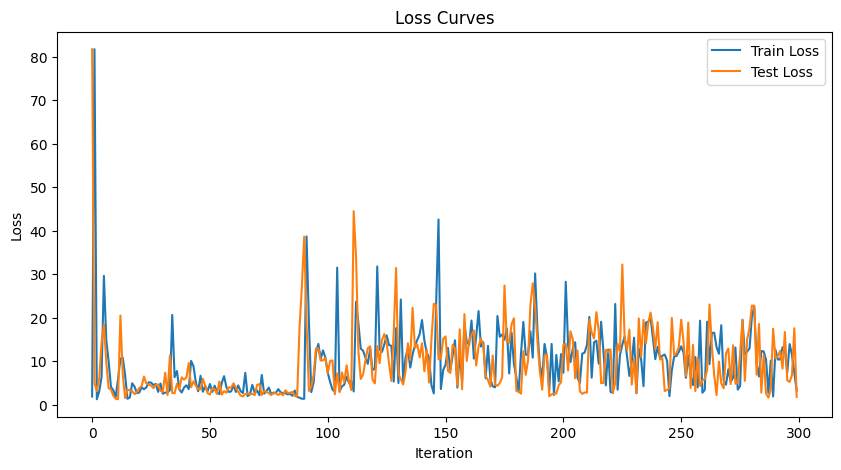

In [ ]:
# Plot Loss
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot(loss_hist)
plt.plot(test_loss_hist)
plt.title("Loss Curves")
plt.legend(["Train Loss", "Test Loss"])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [ ]:
total = 0
correct = 0

# drop_last switched to False to keep all samples
# test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=True, drop_last=False)

with torch.no_grad():
  net.eval()
  for data, targets in train_loader:
    data = data.to(device)
    targets = targets.to(device)

    # forward pass
    test_spk, _ = net(data.view(data.size(0), -1))

    # calculate total accuracy
    _, predicted = test_spk.sum(dim=0).max(1)
    total += targets.size(0)
    correct += (predicted == targets).sum().item()

print(f"Total correctly classified test set images: {correct}/{total}")
print(f"Test Set Accuracy: {100 * correct / total:.2f}%")

Total correctly classified test set images: 60/60
Test Set Accuracy: 100.00%


In [ ]:
import torch

# Assuming your trained model is named 'model'
torch.save(net.state_dict(), 'snnmodel.pth')


In [ ]:
# Load the model
model2 = Net().to(device)
model2.load_state_dict(torch.load('snnmodel.pth'))


<All keys matched successfully>

Test

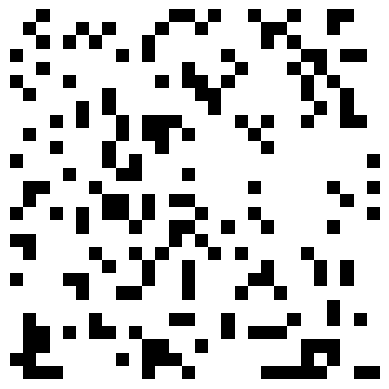

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import random

# Create a new grayscale image with size 30x30
rand_image = Image.new("L", (28 , 28))

# Load pixel data
pixels = rand_image.load()

# Generate random pixels with 75% white and 25% black
for y in range(rand_image.height):
    for x in range(rand_image.width):
        # Generate a random number between 0 and 99
        rand_num = random.randint(0, 99)
        # Set pixel value based on the random number
        if rand_num < 75:
            pixels[x, y] = 255  # Fully white
        else:
            pixels[x, y] = 0    # Fully black

# Display the image
plt.imshow(rand_image, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()

# # Save the image
# image.save("random_image.png")

In [ ]:
from PIL import Image

def crop_center(image, width, height):
    # Get dimensions of the original image
    # image = Image.fromarray(image)
    img_width, img_height = image.size

    # Calculate coordinates to crop the center 28x28 pixels
    left = (img_width - width) // 2
    top = (img_height - height) // 2
    right = (img_width + width) // 2
    bottom = (img_height + height) // 2

    # Crop the center 28x28 pixels
    cropped_image = image.crop((left, top, right, bottom))

    return cropped_image

# Open the original image
original_image = Image.open("/content/thresh_image.jpg")

# Crop the center 28x28 pixels
cropped_image = crop_center(original_image, 28, 28)

# Display the image
plt.imshow(cropped_image)
plt.axis('off')  # Hide axis
plt.show()
plt.imshow(original_image)
plt.axis('off')  # Hide axis
plt.show()


<Figure size 2000x1000 with 0 Axes>

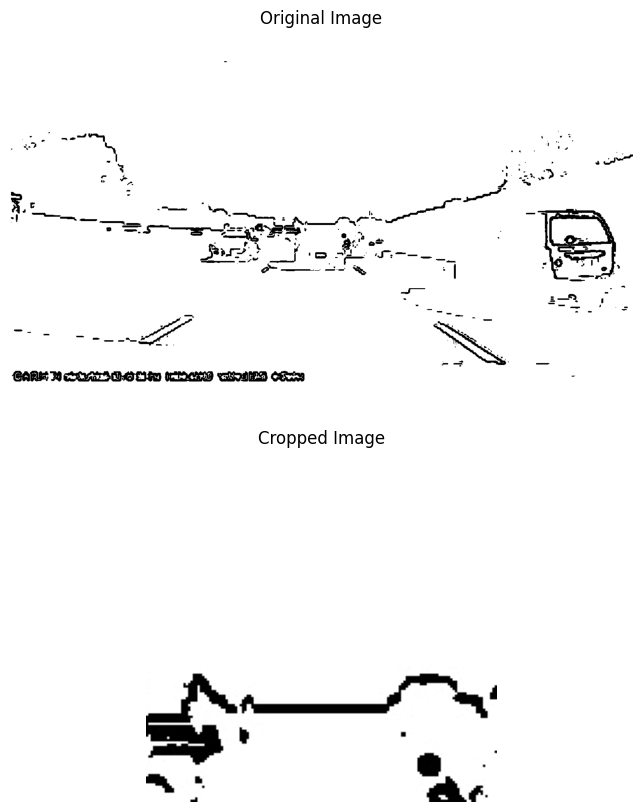

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def crop_center(image, width, height):
    # Get dimensions of the original image
    img_width, img_height = image.size

    # Calculate coordinates to crop the center
    left = (img_width - width) // 2
    top = (img_height - height) // 2
    right = (img_width + width) // 2
    bottom = (img_height + height) // 2

    # Crop the center of the image
    cropped_image = image.crop((left, top, right, bottom))

    return cropped_image

# Open the original image
original_image = Image.open("thresh_image.jpg").convert("L")  # Convert to grayscale if needed

# Crop the center of the image
cropped_image = crop_center(original_image, 150, 150)  # Crop to 28x28 pixels
plt.figure(figsize=(20, 10))
# Display the original and cropped images
# fig, axs = plt.subplots(1, 2)
# axs[0].imshow(original_image, cmap='gray')
# axs[0].set_title('Original Image')
# axs[0].axis('off')
# axs[1].imshow(cropped_image, cmap='gray')
# axs[1].set_title('Cropped Image')
# axs[1].axis('off')
# plt.show()
# Set the figure size
plt.figure(figsize=(50, 10))

# Display the original image
plt.subplot(2, 1, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the cropped image
plt.subplot(2, 1, 2)
plt.imshow(cropped_image, cmap='gray')
plt.title('Cropped Image')
plt.axis('off')

plt.show()


In [ ]:
import torch
from torchvision import transforms
from PIL import Image

# Define the transformation for the input image
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor()
])

# # Create a fully white image
# white_image = Image.new("L", (28, 28), 255)  # Create a new fully white image
white_image_tensor = transform(cropped_image).unsqueeze(0)  # Apply transformation and add batch dimension

# Set your model to evaluation mod
model2.eval()

with torch.no_grad():
    # Move the image tensor to the device (assuming 'device' is defined)
    white_image_tensor = white_image_tensor.to(device)

    # Forward pass
    test_spk, _ = model2(white_image_tensor.view(1, -1))  # Forward pass for a single image

    # Calculate prediction
    _, predicted = test_spk.sum(dim=0).max(1)

    # Print the predicted label
    print("Predicted Label:", predicted.item())

Predicted Label: 0


In [ ]:
edge_detected_image.shape

(168, 300)

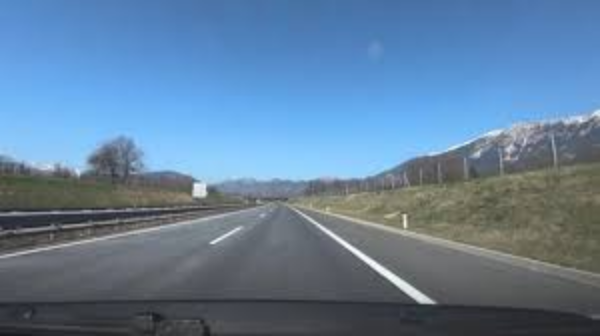

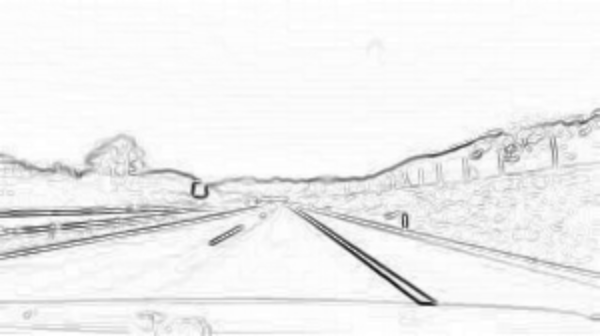

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def rgb_to_grayscale(image):
    # Convert image to grayscale using the formula: R/2 + G/2 + B/2
    # return (image[:,:,0] // 2 + image[:,:,1] // 2 + image[:,:,2] // 2).astype(np.uint8)
    # return (0.299 * image[:,:,0] + 0.587 * image[:,:,1] + 0.114 * image[:,:,2]).astype(np.uint8)
    return (0.299 * image[:,:,0] + 0.587 * image[:,:,1] + 0.114 * image[:,:,2]).astype(np.uint8)

def sobel_edge_detection(image):
    # Sobel filter
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Normalize the gradient magnitude to 0-255
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
    gradient_magnitude=255-gradient_magnitude

    return gradient_magnitude.astype(np.uint8)

# Read image
input_image = cv2.imread('/content/download.jpg')
# Resize input image
# input_image_resized = cv2.resize(input_image, (0,0), fx=2, fy=2)
# Convert image to grayscale using custom formula
grayscale_image = rgb_to_grayscale(input_image)

# Apply Sobel edge detection
edge_detected_image = sobel_edge_detection(grayscale_image)

# cv2.destroyAllWindows()
cv2_imshow(cv2.resize(input_image, (0,0), fx=2, fy=2))  # Display input image larger
cv2_imshow(cv2.resize(edge_detected_image, (0,0), fx=2, fy=2))  # Display edge-detected image larger
cv2.waitKey(0)
cv2.destroyAllWindows()